In [26]:
"""
   An analysis of words in the tweets using word count and word clouds

   Types of analysis performed:
     1. word count-wordcloud including hashtags, one for each unigrams and bigrams
     2. word count-wordcloud excluding hashtags, one for each unigrams and bigrams
     3. word count-wordcloud using POS Tagging (Adjectives, Verbs, Nouns), only unigrams
     
     for all unigram ananlysis: stopwords have been removed
     for all bigrams analysis: stopwords have been retained
"""

import sys
reload(sys)
sys.setdefaultencoding('utf8')

import pandas as pd
import os



data_path = os.path.join(os.path.dirname(os.path.abspath('.')), 'data', 'clean', 'data.csv')
data = pd.read_csv(data_path)

##  Preprocessing and helper functions

In [27]:
# functions to preprocess text further and return wordcounts / frequdictionarties

import sys

from nltk.corpus import stopwords
from nltk import ngrams

#from nltk.tokenize import word_tokenize
# using nltk tokenize : will even split the hashtags and their words

stop_words = set(stopwords.words('english'))

def getGramsList(data):

    """
        get unigrams, bigrams, trigrams for list of sentences.
        custom function
        
        input: list of sentences
        output: tuple :: (unigrams, bigrams, trigrams)
    """
    
    unigrams = []
    bigrams = []
    trigrams = []
         
    for sentence in data:
        try:   
            # lower strings
            
            sentence = str(sentence)
            tokens = map( str.lower , sentence.split())
            
            #remove punctuation
            #tokens =  map(lambda token:regex.sub('', token), tokens)  
            print tokens
            tokens = map(lambda token: token.strip(), tokens)
            
            #filter empty strings
            tokens = filter(lambda token: token != '' and token!='#news' and token!=' ' and token!='news', tokens )
            
            
    
            # generate bigrams/trigrams            
            bigrams.extend(map('_'.join ,ngrams(tokens, n=2)))
            trigrams.extend(map('_'.join ,ngrams(tokens, n=3)))

            
            # remove stopwords (only for unigrams)
            # (retained stopwords for bigrams and trigrams)
            tokens = filter(lambda word: word not in stop_words, tokens)
    
            # Unigrams are generated after removal of stopwords
            unigrams.extend(tokens)
           
            #print sentence.decode("unicode-escape")
        except:       
            print "Unexpected error:", sys.exc_info()[0]
            raise 
            #continue
    
    print len(unigrams)
    return (unigrams, bigrams, trigrams)


def getUnigramFreq(unigrams):
    
    """
        get frequency counts of unigrams. Unigrams is used to generate global vectors.
        Hence must be supplied.
    """    
    
    # init dict with tokens as the keys
    wordFreqDict = dict()
    for word in unigrams:
        if word in wordFreqDict.keys():
            wordFreqDict[word] = wordFreqDict[word] + 1 
        else:
            wordFreqDict[word] = 1

    return wordFreqDict

def getBigramFreq(bigrams):
    

    """
        get frequency counts of bigrams. 
        Hence must be supplied.
    """

    # init dict with tokens as the keys
    wordFreqDict = dict()
    for bigram in bigrams:
        #word = '_'.join(word_tuples)
        if bigram in wordFreqDict.keys():
            wordFreqDict[bigram] = wordFreqDict[bigram] + 1
        else:
            wordFreqDict[bigram] = 1
         
    return wordFreqDict

def getTrigramFreq(trigrams):
    """
        get frequency counts of bigrams. 
        Hence must be supplied.
    """

    # init dict with tokens as the keys
    wordFreqDict = dict()
    for trigram in trigrams:
        #word = '_'.join(word_tuples)
        if trigram in wordFreqDict.keys():
            wordFreqDict[trigram] = wordFreqDict[trigram] + 1
        else:
            wordFreqDict[trigram] = 1
         
    return wordFreqDict






In [28]:
unigrams, bigrams, trigrams = getGramsList(data["text"].values)


## Word Analysis : (with hashtags present)

In [29]:
# # generate word clouds using wordcloud.genereate(text) method 
# # NOTE: This method will also show hastag words without the hashtag

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# print len(unigrams)
# # unigrams wordcloud
# wordcloud = WordCloud(max_words=50, width=1000, height=800, max_font_size=40).generate(' '.join(unigrams).decode("unicode-escape"))
# plt.figure(figsize=(20,10), facecolor='k' )
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# print len(bigrams)
# # bigrams wordcloud
# wordcloud = WordCloud(max_words=50, width=1000, height=800, max_font_size=40).generate(' '.join(bigrams).decode("unicode-escape"))
# plt.figure(figsize=(20,10), facecolor='k')
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")

# plt.show()

(-0.5, 999.5, 799.5, -0.5)

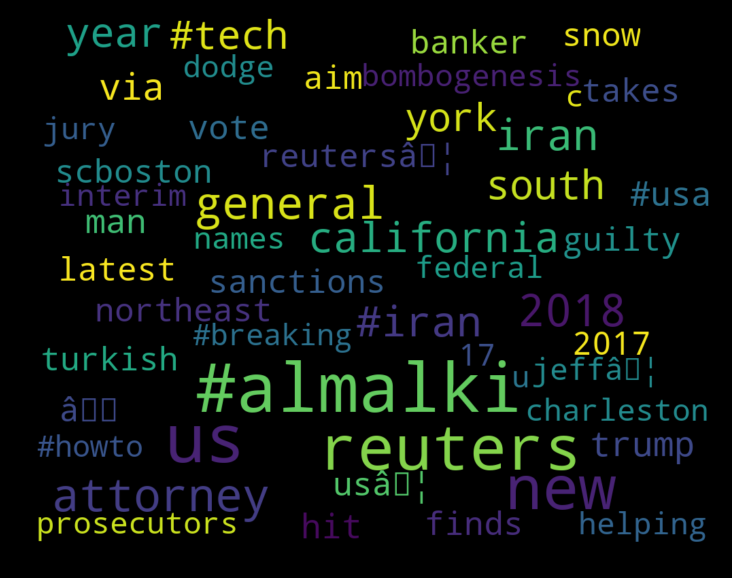

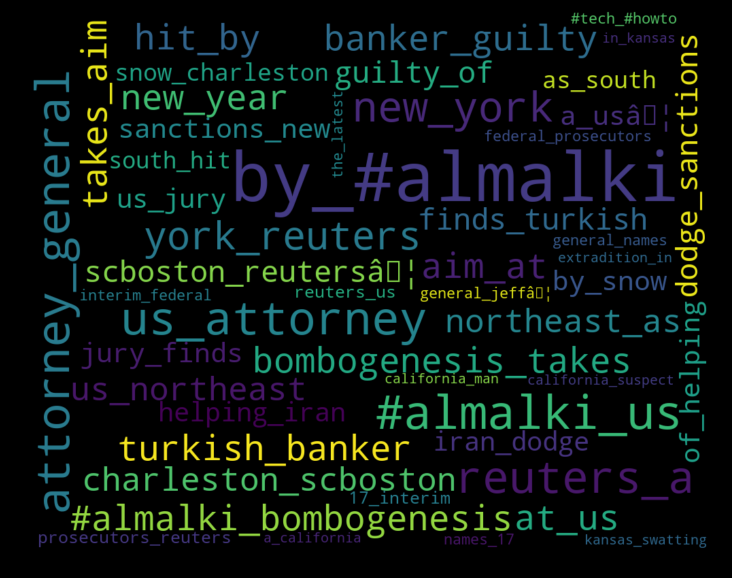

In [30]:
# generate word clouds from freqDict
# This method will show the words exactly as we give it in a dictionary

from wordcloud import WordCloud
import matplotlib.pyplot as plt

print len(unigrams)
# unigrams wordcloud
wordcloud = WordCloud(max_words=50, width=1000, height=800, max_font_size=40).generate_from_frequencies(getUnigramFreq(unigrams), max_font_size=100)
plt.figure(figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")



print len(bigrams)
# unigrams wordcloud
wordcloud = WordCloud(max_words=50, width=1000, height=800, max_font_size=40).generate_from_frequencies(getBigramFreq(bigrams), max_font_size=100)
plt.figure(figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Word Analysis after removal of hashtags

In [31]:
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.RESERVED)
clean = []
for tweet in data["text"].values:
    
    clean.append(p.clean(tweet))

    
    
    

(-0.5, 1199.5, 799.5, -0.5)

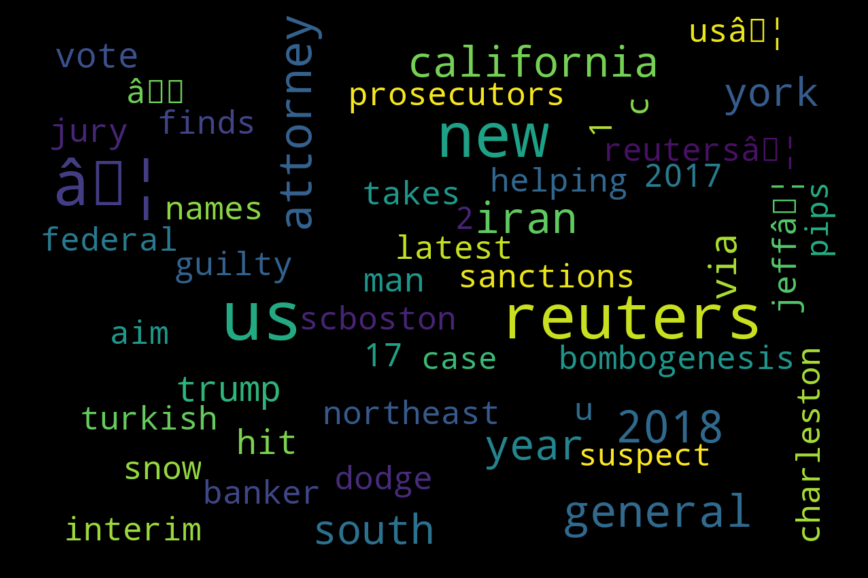

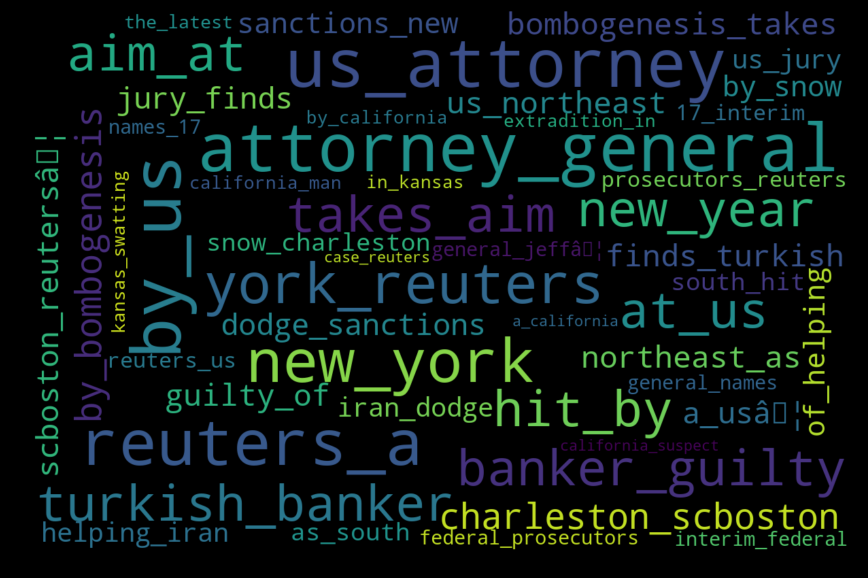

In [32]:
# generate word clouds from freqDict

unigrams, bigrams, trigrams = getGramsList(clean)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

print len(unigrams)
# unigrams wordcloud
wordcloud = WordCloud(max_words=50, width=1200, height=800, max_font_size=40).generate_from_frequencies(getUnigramFreq(unigrams), max_font_size=100)
plt.figure(figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")



print len(bigrams)
# unigrams wordcloud
wordcloud = WordCloud(max_words=50, width=1200, height=800, max_font_size=40).generate_from_frequencies(getBigramFreq(bigrams), max_font_size=100)
plt.figure(figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## word analysis pos tagging: (adjectives, nouns, verbs):

(-0.5, 1199.5, 799.5, -0.5)

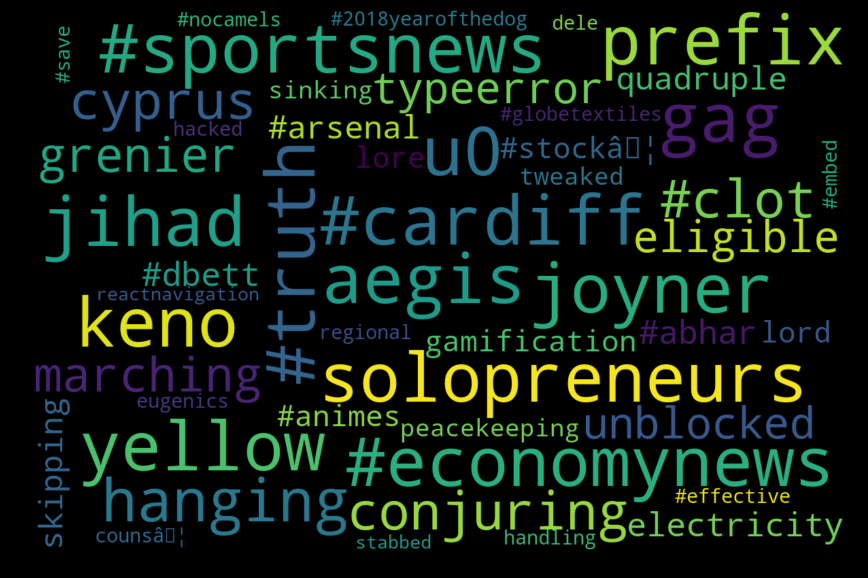

In [33]:
import nltk
from nltk.stem import WordNetLemmatizer

def getPOSBagOfWords():
    """
        generate unigrams of adjectives, nouns and adverbs only
        preprocessimg: Lemmatize the words after extracting the required pos words
    """
    WordNetLemmatizer()
    pos_bagOfWords  = [] 
    for tweet in data["text"].values:
        #tweet = self.preprocessing(tweet)
        pos_tuple=nltk.pos_tag(tweet.split())
        for token, pos_tag in pos_tuple:
            if pos_tag.startswith("NN") or pos_tag.startswith("JJ") or pos_tag.startswith("VB"):
            #| value.startswith("JJR") | value.startswith("JJS") | value.startswith("NNS") | value.startswith("NNP") | value.startswith("NNPS") | value.startswith("VBD")| value.startswith("VBG") | value.startswith("VBN") | value.startswith("VBP") | value.startswith("VBZ"):
            # print token
                lemmatized_token = wordnet_lemmatizer.lemmatize(token)
                if lemmatized_token not in pos_bagOfWords:
                    pos_bagOfWords.append(lemmatized_token)
    return pos_bagOfWords



# generate word clouds from freqDict
from wordcloud import WordCloud
import matplotlib.pyplot as plFt

# pos: addjective, nouns, verbs wordcloud
wordcloud = WordCloud(max_words=50, width=1200, height=800, max_font_size=40).generate_from_frequencies( getUnigramFreq(getPOSBagOfWords()), max_font_size=100)
plt.figure(figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Conclusion

1. The word cloud generated by just pos tags is completely different from the word cloud generated by all the words present.

2. First word cloud analysis with hashtags present has a lot of noise (#alamalki, # tech etc). They don'nt provide any interesting or new information.

3. The second word cloud analysis with hashtags removed has interesting keywords. Also the bigrams are more descriptive than the unigrams The following example explains clearly:                    
 *Ex: US_BANKER bigrams is more informative for visualization than us, banker as seperate unigrams in the   wordcloud. The bigrams clearly show that the tweets are talking about US_BANKERS*
    
4. The third wordClould Analysis using the POS TAGS (Adjectives, verbs and Nouns) seem to provide different sort of information than the first two wordcloud analysis tasks. (As you can see most of the terms in this are, "-"ve sentiment verbs such as "hanging", "stabbed", "dbett", "save" etc...). I guess this word cloud is more usefull for analyzing the overall sentiments in the news.

5. An interesting method to try would be, is to use tf-idf for each tweet and extract top 3 topics from each tweet and then visualize a word cloud on the frequency of these topics across documents.
